In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Mumbai-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,HR,DY,MO,YEAR,QV2M,WS50M,WD50M
0,0,21.56,1.0,5,1,4,2011,14.65,3.52,23.38
1,1,22.55,1.0,6,1,4,2011,14.65,3.10,34.41
2,2,25.80,1.0,7,1,4,2011,13.43,2.93,12.96
3,3,29.21,1.0,8,1,4,2011,10.44,3.33,349.85
4,4,32.30,1.0,9,1,4,2011,8.06,3.71,333.38
...,...,...,...,...,...,...,...,...,...,...
87667,87667,24.76,1.0,0,1,4,2021,16.78,1.01,286.19
87668,87668,24.58,1.0,1,1,4,2021,16.91,0.67,274.71
87669,87669,24.36,1.0,2,1,4,2021,17.03,0.41,256.76
87670,87670,24.09,1.0,3,1,4,2021,17.03,0.21,213.11


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "HR","DY","MO","YEAR","QV2M","WS50M"], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.17063121, 0.20797514])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


WD50M    0.207975
T2M      0.170631
dtype: float64

<AxesSubplot:>

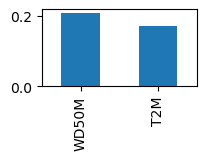

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({1.0: 42236, 0.0: 27901})
The number of classes after fit Counter({1.0: 42236, 0.0: 42236})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[5707 1268]
 [5065 5495]]
0.6388366124893071
              precision    recall  f1-score   support

         0.0       0.53      0.82      0.64      6975
         1.0       0.81      0.52      0.63     10560

    accuracy                           0.64     17535
   macro avg       0.67      0.67      0.64     17535
weighted avg       0.70      0.64      0.64     17535



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.669283866894754

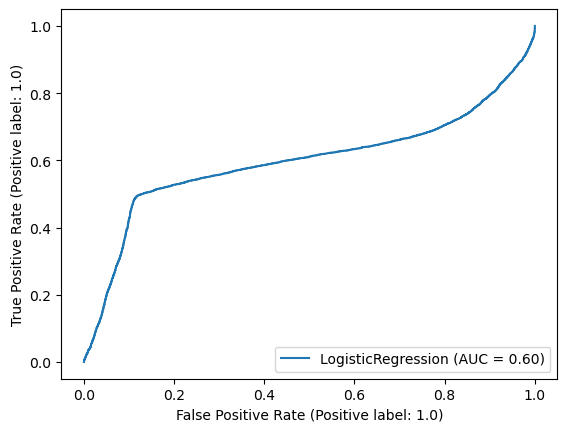

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[6007  968]
 [3267 7293]]
0.7584830339321357
              precision    recall  f1-score   support

         0.0       0.65      0.86      0.74      6975
         1.0       0.88      0.69      0.77     10560

    accuracy                           0.76     17535
   macro avg       0.77      0.78      0.76     17535
weighted avg       0.79      0.76      0.76     17535



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7759218189964157

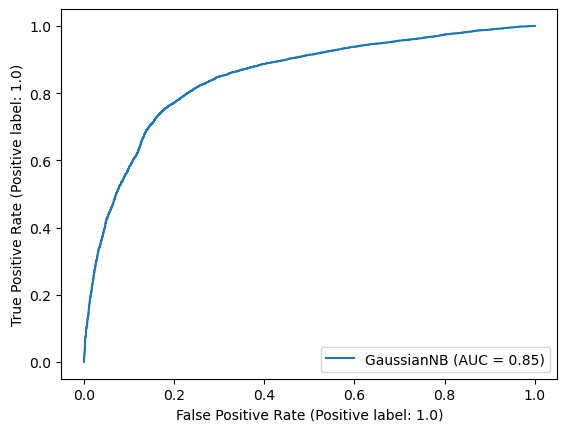

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[5282 1693]
 [2345 8215]]
0.7697177074422583
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72      6975
         1.0       0.83      0.78      0.80     10560

    accuracy                           0.77     17535
   macro avg       0.76      0.77      0.76     17535
weighted avg       0.77      0.77      0.77     17535



In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7676057958618442

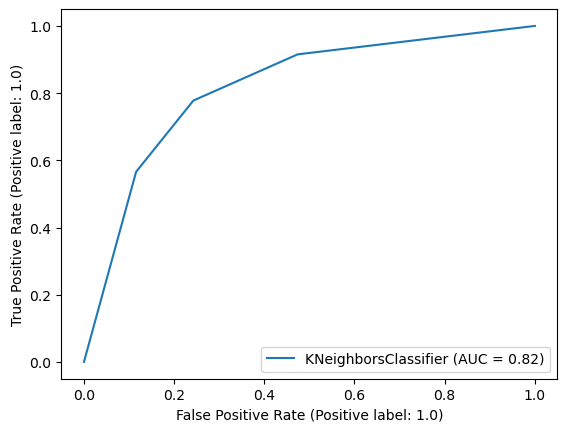

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
# svc = SVC()


In [23]:
# svc.fit(X_train_res, y_train_res)


In [24]:
# y_pred5 = svc.predict(X_test)
# print(confusion_matrix(y_test,y_pred5))
# print(accuracy_score(y_test,y_pred5))
# print(classification_report(y_test,y_pred5))

In [25]:
# metrics.plot_roc_curve(svc, X_test, y_test)
# metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[4568 2407]
 [ 783 9777]]
0.818078129455375
              precision    recall  f1-score   support

         0.0       0.85      0.65      0.74      6975
         1.0       0.80      0.93      0.86     10560

    accuracy                           0.82     17535
   macro avg       0.83      0.79      0.80     17535
weighted avg       0.82      0.82      0.81     17535



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7903813334962528

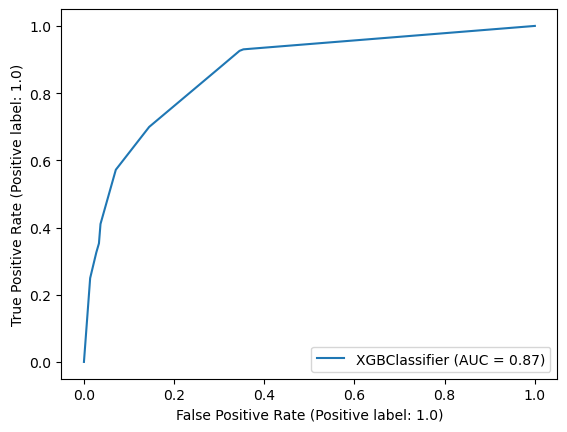

In [28]:
metrics.plot_roc_curve(bst, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None)


In [29]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [30]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[5266 1709]
 [1993 8567]]
0.788879384088965
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      6975
         1.0       0.83      0.81      0.82     10560

    accuracy                           0.79     17535
   macro avg       0.78      0.78      0.78     17535
weighted avg       0.79      0.79      0.79     17535



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.783125509123493

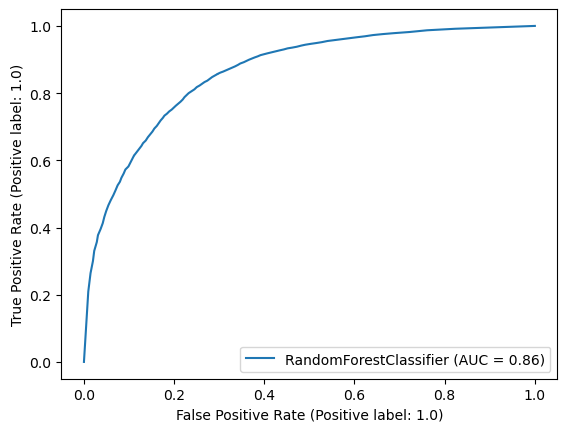

In [31]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [32]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.036274
0:	total: 59.7ms	remaining: 1m 59s
1:	total: 70.7ms	remaining: 1m 10s
2:	total: 83.3ms	remaining: 55.5s
3:	total: 94.2ms	remaining: 47s
4:	total: 104ms	remaining: 41.4s
5:	total: 114ms	remaining: 37.8s
6:	total: 122ms	remaining: 34.8s
7:	total: 131ms	remaining: 32.6s
8:	total: 139ms	remaining: 30.8s
9:	total: 148ms	remaining: 29.4s
10:	total: 156ms	remaining: 28.1s
11:	total: 165ms	remaining: 27.3s
12:	total: 175ms	remaining: 26.8s
13:	total: 186ms	remaining: 26.4s
14:	total: 196ms	remaining: 25.9s
15:	total: 205ms	remaining: 25.5s
16:	total: 216ms	remaining: 25.1s
17:	total: 227ms	remaining: 24.9s
18:	total: 236ms	remaining: 24.6s
19:	total: 244ms	remaining: 24.1s
20:	total: 252ms	remaining: 23.7s
21:	total: 260ms	remaining: 23.4s
22:	total: 269ms	remaining: 23.1s
23:	total: 277ms	remaining: 22.8s
24:	total: 286ms	remaining: 22.6s
25:	total: 294ms	remaining: 22.3s
26:	total: 302ms	remaining: 22.1s
27:	total: 311ms	remaining: 21.9s
28:	total: 319ms	remaini

In [33]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5348 1627]
 [1547 9013]]
0.8189905902480753
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      6975
         1.0       0.85      0.85      0.85     10560

    accuracy                           0.82     17535
   macro avg       0.81      0.81      0.81     17535
weighted avg       0.82      0.82      0.82     17535



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8101210695666341

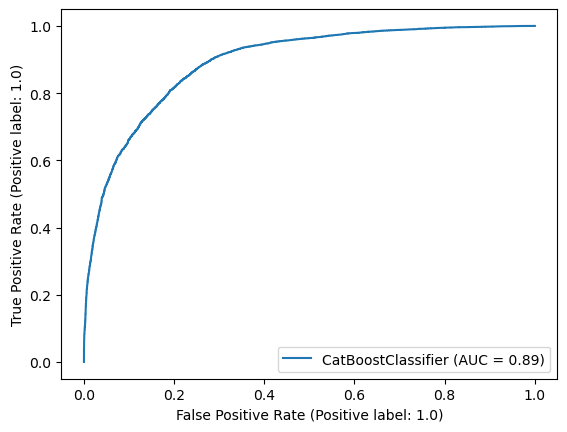

In [34]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [35]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

NameError: name 'svc' is not defined